In [144]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from datetime import date
from datetime import datetime
import calendar
import os
import re


from scipy import stats
from sklearn.neighbors import KernelDensity
import matplotlib.colors as mcolors
from matplotlib.animation import FuncAnimation, PillowWriter

import seaborn as sns
from pathlib import Path
from tqdm import tqdm_notebook, trange, tqdm
from PIL import Image, ImageDraw
import io
import random as r

from matplotlib.widgets import Slider, Button, RadioButtons
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
# For downsampling
from sklearn.utils import resample,shuffle

In [145]:
df_companies = pd.read_csv("./data/companies.csv")
df_payments = pd.read_csv("./data/payments.csv")
df_physicians = pd.read_csv("./data/physicians.csv")

c:\python38\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [146]:
df_companies.rename({"State":"State_Comp","Country":"Country_Comp"}, axis='columns', inplace=True)
#df_companies.shape
df_companies

,Company_ID,Name,State_Comp,Country_Comp
0,1,Merck Sharp & Dohme Corporation,NJ,United States
1,2,"COMSORT, Inc",MD,United States
2,3,Daiichi Sankyo Company LTD,NaN,Japan
3,4,"C. R. Bard, Inc. & Subsidiaries",NJ,United States
4,5,Novartis Pharma AG,NaN,Switzerland
...,...,...,...,...
2426,2427,Amryt Pharma Holdings Ltd,NaN,Ireland
2427,2428,"Heraeus Medical Components, LLC",MN,United States
2428,2429,International Life Sciences,GA,United States
2429,2430,"Foundation Consumer Healthcare, LLC",PA,United States


In [147]:
df_physicians.rename({"State":"State_Phys","Country":"Country_Phys"}, axis='columns', inplace=True)
df_physicians

,id,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5
0,1,train,LEIGH,B,HOPPE,NaN,FORT PIERCE,FL,34950,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Obstetrics...,FL,NaN,NaN,NaN,NaN
1,2,train,STEVEN,NaN,FRANK,NaN,TOWSON,MD,21204-6808,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Anesthesio...,MD,NaN,NaN,NaN,NaN
2,3,train,THOMAS,NaN,COUCH,JR.,TROY,NY,12180-2832,UNITED STATES,NaN,Podiatric Medicine & Surgery Service Providers...,NY,NaN,NaN,NaN,NaN
3,4,train,CLAUDE,NaN,SU,NaN,SAVANNAH,GA,31419-1753,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,GA,SC,AL,NaN,NaN
4,5,train,ROBERT,C,SCHENCK,NaN,ALBUQUERQUE,NM,87131-0001,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Orthopaedi...,NM,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,5996,train,MARC,NaN,WEINSTEIN,NaN,TEMPLE TERRACE,FL,33637-0925,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Orthopaedi...,FL,NaN,NaN,NaN,NaN
5996,5997,train,CHARLES,W,YOWELL,NaN,TALLAHASSEE,FL,32308-4620,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Urology,FL,SC,NaN,NaN,NaN
5997,5998,train,MARK,O,GABBIE,NaN,TEXARKANA,AR,71854,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Family Med...,AR,TX,NaN,NaN,NaN
5998,5999,test,KRISHNASWAMY,NaN,GAJARAJ,NaN,RANDOLPH,MA,02368-2100,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Psychiatry...,MA,NaN,NaN,NaN,NaN


In [148]:
pd.set_option('display.max_columns', None)
df_payments.head()
#df_payments.shape

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3
0,1,2455,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN
1,2,1534,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN
2,3,2632,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN
3,4,550,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN
4,5,1710,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_payments.describe(include="all")

In [149]:
#combine into one df
df = pd.merge(df_payments, df_physicians, left_on='Physician_ID', right_on='id', how='left').drop('id', axis=1)
df = pd.merge(df, df_companies, on='Company_ID', how='left')
df.shape


(1402250, 48)

In [150]:
df.rename({"Name":"Company_Name"}, axis='columns', inplace=True)
pd.set_option('display.max_columns', None)


df.head()

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp
0,1,2455,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,train,THIPPESWAMY,H,MURTHY,NaN,FAYETTEVILLE,GA,30214-2114,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,"Medtronic Vascular, Inc.",MN,United States
1,2,1534,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,train,ROMEO,NaN,JONES,NaN,BROOKLYN,NY,11217-1889,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,Amarin Pharma Inc.,NJ,United States
2,3,2632,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
3,4,550,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,train,ROBYN,G,YOUNG,NaN,ALAMEDA,CA,94501-6447,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
4,5,1710,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,train,Lanetta,NaN,Anderson,NaN,MEMPHIS,TN,38104-2934,UNITED STATES,NaN,NaN,TN,NaN,NaN,NaN,NaN,Actavis Pharma Inc,NJ,United States


In [151]:
df_main_test=df[df.set=="test"]
df_main_test

,Record_ID,Physician_ID,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,First_Name,Middle_Name,Last_Name,Name_Suffix,City,State_Phys,Zipcode,Country_Phys,Province,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,Company_Name,State_Comp,Country_Comp
2,3,2632,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,DEEPAK,NaN,RAHEJA,NaN,CLEVELAND,OH,44113-3612,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
10,11,2401,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,6300487101,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,HARMINDER,S,SANDHU,NaN,NEW YORK,NY,10128-4077,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,DC,NaN,NaN,NaN,NaN,Questcor Pharmaceuticals,CA,United States
18,19,3922,334,19.73,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,4940110201,NaN,NaN,Drug or Biological,NaN,NaN,BENLYSTA,NaN,NaN,NaN,NaN,NaN,test,ROBERT,G,LAHITA,NaN,PATERSON,NJ,07503-2621,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,NJ,NY,NaN,NaN,NaN,"GlaxoSmithKline, LLC.",NC,United States
19,20,896,358,10.88,08/01/2013,1,Cash or cash equivalent,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,3023789006,NaN,NaN,Drug or Biological,NaN,NaN,PROVENGE,NaN,NaN,NaN,NaN,NaN,test,ROBERT,B,REYNOLDS,NaN,ALTAMONTE SPRINGS,FL,32701-5002,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Internal M...,FL,NaN,NaN,NaN,NaN,Dendreon Corporation,WA,United States
21,22,539,242,78.95,08/01/2013,1,In-kind items and services,Consulting Fee,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,6476424060,NaN,NaN,Drug or Biological,NaN,NaN,Amitiza,NaN,NaN,NaN,NaN,NaN,test,ROY,M,KOGA,NaN,HILO,HI,96720-2660,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Family Med...,HI,NaN,NaN,NaN,NaN,"Takeda Pharmaceuticals America, Inc.",IL,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402236,1402237,5046,74,14.89,12/31/2019,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Yes,0169-4132-12,NaN,NaN,Drug,NaN,NaN,Ozempic,NaN,NaN,Diabetes,NaN,NaN,test,VALERIE,J,KUENZLI,NaN,COLUMBUS,OH,43213-3189,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Family Med...,OH,NaN,NaN,NaN,NaN,Novo Nordisk Inc,NJ,United States
1402238,1402239,473,700,35.26,12/31/2019,1,Cash or cash equivalent,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Device,NaN,NaN,NEW PRODUCT DEVELOPMENT,NaN,NaN,NEW PRODUCT DEVELOPMENT,NaN,NaN,test,MICHAEL,A,MASINI,NaN,YPSILANTI,MI,48197-8634,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Orthopaedi...,MI,NaN,NaN,NaN,NaN,Stryker Corporation,MI,United States
1402240,1402241,4940,836,52.91,12/31/2019,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Device,NaN,NaN,Modulus,NaN,NaN,Spine/Spine Surgery,NaN,NaN,test,KALMAN,NaN,BLUMBERG,NaN,FT LAUDERDALE,FL,33308-2226,UNITED STATES,NaN,Allopathic & Osteopathic Physicians|Orthopaedi...,

In [113]:
df.drop(columns=['Record_ID', 'Physician_ID', 'First_Name', 'Middle_Name', 'Last_Name', 'Name_Suffix', 'Company_Name','Province'],inplace=True)
df.head()

,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,City,State_Phys,Zipcode,Country_Phys,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,State_Comp,Country_Comp
0,597,48.78,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Device or Medical Supply,NaN,NaN,Pacemakers,NaN,NaN,NaN,NaN,NaN,train,FAYETTEVILLE,GA,30214-2114,UNITED STATES,Allopathic & Osteopathic Physicians|Internal M...,GA,NaN,NaN,NaN,NaN,MN,United States
1,593,122.43,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,No,NaN,NaN,Covered,1529370001,NaN,NaN,Drug or Biological,NaN,NaN,Vascepa,NaN,NaN,NaN,NaN,NaN,train,BROOKLYN,NY,11217-1889,UNITED STATES,Allopathic & Osteopathic Physicians|Internal M...,NY,NaN,NaN,NaN,NaN,NJ,United States
2,760,10.26,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,test,CLEVELAND,OH,44113-3612,UNITED STATES,Allopathic & Osteopathic Physicians|Psychiatry...,OH,NaN,NaN,NaN,NaN,CA,United States
3,760,13.68,08/01/2013,1,In-kind items and services,Education,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,NaN,NaN,NaN,Drug or Biological,NaN,NaN,ACTHAR,NaN,NaN,NaN,NaN,NaN,train,ALAMEDA,CA,94501-6447,UNITED STATES,Allopathic & Osteopathic Physicians|Psychiatry...,CA,NaN,NaN,NaN,NaN,CA,United States
4,826,17.17,08/01/2013,1,In-kind items and services,Food and Beverage,NaN,NaN,NaN,No,No Third Party Payment,NaN,NaN,NaN,Covered,5254420431,NaN,NaN,Drug or Biological,NaN,NaN,GENERESS,NaN,NaN,NaN,NaN,NaN,train,MEMPHIS,TN,38104-2934,UNITED STATES,NaN,TN,NaN,NaN,NaN,NaN,NJ,United States


In [119]:
# def string_date(date):
#     return datetime.strptime(str(date),"%m/%d/%Y")

#df['Date'].apply(string_date)
df['Date']=pd.to_datetime(df['Date'])
# df.head()
# df.sort_values(by='Date')
# df.dtypes
# pd.set_option('display.float_format', str)
# fig = plt.figure(figsize = (10,5))
# ax = fig.gca()
# attribute='Date'
# df[attribute].value_counts().plot()
# df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "Yes"),1,df.Ownership_Indicator)
# df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "No"),0,df.Ownership_Indicator)
df[['Company_ID','Number_of_Payments']]=df[['Company_ID','Number_of_Payments']].astype(int)
df['Total_Amount_of_Payment_USDollars']=df['Total_Amount_of_Payment_USDollars'].astype(float)
# df.Ownership_Indicator.value_counts(dropna=False)
df.dtypes


Company_ID                                         int32
Total_Amount_of_Payment_USDollars                float64
Date                                      datetime64[ns]
Number_of_Payments                                 int32
Form_of_Payment_or_Transfer_of_Value              object
Nature_of_Payment_or_Transfer_of_Value            object
City_of_Travel                                    object
State_of_Travel                                   object
Country_of_Travel                                 object
Ownership_Indicator                               object
Third_Party_Recipient                             object
Charity                                           object
Third_Party_Covered                               object
Contextual_Information                            object
Related_Product_Indicator                         object
Product_Code_1                                    object
Product_Code_2                                    object
Product_Code_3                 

In [118]:

print(df.columns)
# df[df.Ownership_Indicator=="yes"].Charity.value_counts(dropna=False)
# df.Primary_Specialty.value_counts()
#df.Third_Party_Recipient.value_counts(dropna=False)
# print(pd.unique(df[['Product_Code_1', 'Product_Code_2', 'Product_Code_3']].values.ravel('K')))

df = df.astype(str)
for column in df.columns:
     if(df[column].dtype=='object'):
        df[column] = df[column].str.lower()


# df.head()
#CONCLUSION:
#iterate through and drop all record with no name but code, since these are all for
#0 Ownership_Indicator, can lead to balanced data
#ultimatey drop Product Code Type and category Columns
#df_scrap=df.query('License_State_1.isnull() and License_State_5.notna()', engine='python')

# df['Contextual_Information'].unique()
# df_scrap = df.query('Country_Phys')
# df_scrap['Ownership_Indicator'].value_counts()

# name_list = pd.unique(df[['Product_Name_1', 'Product_Name_2', 'Product_Name_3']].values.ravel('K'))
# print("nan" in name_list)
# name_list = np.delete(name_list,np.where(name_list=="nan"))
# print("nan" in name_list)

Index(['Company_ID', 'Total_Amount_of_Payment_USDollars', 'Date',
       'Number_of_Payments', 'Form_of_Payment_or_Transfer_of_Value',
       'Nature_of_Payment_or_Transfer_of_Value', 'City_of_Travel',
       'State_of_Travel', 'Country_of_Travel', 'Ownership_Indicator',
       'Third_Party_Recipient', 'Charity', 'Third_Party_Covered',
       'Contextual_Information', 'Related_Product_Indicator', 'Product_Code_1',
       'Product_Code_2', 'Product_Code_3', 'Product_Type_1', 'Product_Type_2',
       'Product_Type_3', 'Product_Name_1', 'Product_Name_2', 'Product_Name_3',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'set',
       'City', 'State_Phys', 'Zipcode', 'Country_Phys', 'Primary_Specialty',
       'License_State_1', 'License_State_2', 'License_State_3',
       'License_State_4', 'License_State_5', 'State_Comp', 'Country_Comp'],
      dtype='object')


## Cell for encoding starts here

In [120]:

name_list = pd.unique(df[['Product_Name_1', 'Product_Name_2', 'Product_Name_3']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Product_Name_1'] = df['Product_Name_1'].apply(product_encode)
df['Product_Name_2'] = df['Product_Name_2'].apply(product_encode)
df['Product_Name_3'] = df['Product_Name_3'].apply(product_encode)

name_list = pd.unique(df[['Product_Code_1', 'Product_Code_2', 'Product_Code_3']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Product_Code_1'] = df['Product_Code_1'].apply(product_encode)
df['Product_Code_2'] = df['Product_Code_2'].apply(product_encode)
df['Product_Code_3'] = df['Product_Code_3'].apply(product_encode)

name_list = pd.unique(df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Product_Category_1'] = df['Product_Category_1'].apply(product_encode)
df['Product_Category_2'] = df['Product_Category_2'].apply(product_encode)
df['Product_Category_3'] = df['Product_Category_3'].apply(product_encode)

name_list = pd.unique(df[['Product_Type_1', 'Product_Type_2','Product_Type_3']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Product_Type_1'] = df['Product_Type_1'].apply(product_encode)
df['Product_Type_2'] = df['Product_Type_2'].apply(product_encode)
df['Product_Type_3'] = df['Product_Type_3'].apply(product_encode)


name_list = pd.unique(df[['License_State_1', 'License_State_2', 'License_State_3', 'License_State_4', 'License_State_5']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def license_encode(license_state):
    return name_list_dict.get(license_state)

df['License_State_1']=df['License_State_1'].apply(license_encode)
df['License_State_2']=df['License_State_2'].apply(license_encode)
df['License_State_3']=df['License_State_3'].apply(license_encode)
df['License_State_4']=df['License_State_4'].apply(license_encode)
df['License_State_5']=df['License_State_5'].apply(license_encode)

name_list = pd.unique(df[['Country_Comp', 'Country_Phys','Country_of_Travel']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['Country_Comp'] = df['Country_Comp'].apply(product_encode)
df['Country_Phys'] = df['Country_Phys'].apply(product_encode)
df['Country_of_Travel'] = df['Country_of_Travel'].apply(product_encode)

name_list = pd.unique(df[['State_Comp', 'State_Phys', 'State_of_Travel']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['State_Comp'] = df['State_Comp'].apply(product_encode)
df['State_Phys'] = df['State_Phys'].apply(product_encode)
df['State_of_Travel'] = df['State_of_Travel'].apply(product_encode)

name_list = pd.unique(df[['City_of_Travel', 'City']].values.ravel('K'))
# name_list = np.delete(name_list,np.where(name_list=="nan"))
name_list_dict = {}
int_code=int(1)
for name in name_list:
    name_list_dict.update({name:int_code})
    int_code+=1

def product_encode(product_name):
    return name_list_dict.get(product_name)

df['City_of_Travel'] = df['City_of_Travel'].apply(product_encode)
df['City'] = df['City'].apply(product_encode)

df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "yes"),1,df.Ownership_Indicator)
df['Ownership_Indicator']=np.where((df.Ownership_Indicator == "no"),0,df.Ownership_Indicator)

df['Date_year']=df['Date'].dt.year
df['Date_month']=df['Date'].dt.month
df['Date_day']=df['Date'].dt.day

columns_encode=['Nature_of_Payment_or_Transfer_of_Value','Form_of_Payment_or_Transfer_of_Value','Zipcode','Third_Party_Recipient', 'Charity', 'Third_Party_Covered','Contextual_Information', 'Related_Product_Indicator','Primary_Specialty']
for column in columns_encode:
    df[column]=df[column].astype('category')
    df[column]=df[column].cat.codes

print(df.dtypes)
df

Company_ID                                         int32
Total_Amount_of_Payment_USDollars                float64
Date                                      datetime64[ns]
Number_of_Payments                                 int32
Form_of_Payment_or_Transfer_of_Value                int8
Nature_of_Payment_or_Transfer_of_Value              int8
City_of_Travel                                     int64
State_of_Travel                                    int64
Country_of_Travel                                  int64
Ownership_Indicator                               object
Third_Party_Recipient                               int8
Charity                                             int8
Third_Party_Covered                                 int8
Contextual_Information                             int16
Related_Product_Indicator                           int8
Product_Code_1                                     int64
Product_Code_2                                     int64
Product_Code_3                 

,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,City,State_Phys,Zipcode,Country_Phys,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,State_Comp,Country_Comp,Date_year,Date_month,Date_day
0,597,48.78,2013-08-01,1,3,8,1,32,26,0,2,0,0,29736,1,1,1,1,1,3,3,1,10,10,1,1,1,train,59,22,1742,1,30,1,53,53,53,53,1,1,2013,8,1
1,593,122.43,2013-08-01,1,3,8,1,32,26,0,2,1,0,29736,1,2,1,1,2,3,3,2,10,10,1,1,1,train,66,13,646,1,30,2,53,53,53,53,2,1,2013,8,1
2,760,10.26,2013-08-01,1,3,6,1,32,26,0,2,0,0,29736,1,1,1,1,2,3,3,3,10,10,1,1,1,test,238,15,2805,1,120,3,53,53,53,53,3,1,2013,8,1
3,760,13.68,2013-08-01,1,3,6,1,32,26,0,2,0,0,29736,1,1,1,1,2,3,3,3,10,10,1,1,1,train,1563,3,5215,1,120,4,53,53,53,53,3,1,2013,8,1
4,826,17.17,2013-08-01,1,3,8,1,32,26,0,2,0,0,29736,1,3,1,1,2,3,3,4,10,10,1,1,1,train,29,16,2537,1,160,5,53,53,53,53,2,1,2013,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402245,401,11838.32,2019-12-31,2,1,12,1,32,26,0,2,0,0,29736,5,1,1,1,4,3,3,6058,10,10,9,1,1,train,42,11,2187,1,50,15,53,53,53,53,14,1,2019,12,31
1402246,1268,9.57,2019-12-31,1,1,8,1,32,26,0,2,0,0,29736,5,1184,2649,2588,5,5,5,7392,7392,7392,11,11,11,train,1021,11,2330,1,16,15,53,53,53,53,11,1,2019,12,31
1402247,1220,1536.61,2019-12-31,1,1,13,719,32,3,0,2,0,0,29736,2,1,1,1,3,3,3,10,10,10,1,1,1,train,28,17,4176,1,71,4,13,53,53,53,3,1,2019,12,31
1402248,964,2150.00,2019-12-31,1,1,1,1,32,26,0,1,0,2,29736,5,2333,1,1,5,3,3,7422,10,10,1292,1,1,test,140,3,5148,1,120,4,8,53,53,53,13,1,2019,12,31


In [82]:


df.head()

,Company_ID,Total_Amount_of_Payment_USDollars,Date,Number_of_Payments,Form_of_Payment_or_Transfer_of_Value,Nature_of_Payment_or_Transfer_of_Value,City_of_Travel,State_of_Travel,Country_of_Travel,Ownership_Indicator,Third_Party_Recipient,Charity,Third_Party_Covered,Contextual_Information,Related_Product_Indicator,Product_Code_1,Product_Code_2,Product_Code_3,Product_Type_1,Product_Type_2,Product_Type_3,Product_Name_1,Product_Name_2,Product_Name_3,Product_Category_1,Product_Category_2,Product_Category_3,set,City,State_Phys,Zipcode,Country_Phys,Primary_Specialty,License_State_1,License_State_2,License_State_3,License_State_4,License_State_5,State_Comp,Country_Comp,Date_year,Date_month,Date_day
0,597,48.78,2013-08-01,1,3,8,NaN,NaN,NaN,0,2,0,0,29736,1,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,train,58,22.0,1742,1,30,1,NaN,NaN,NaN,NaN,1.0,1,2013,8,1
1,593,122.43,2013-08-01,1,3,8,NaN,NaN,NaN,0,2,1,0,29736,1,1.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,train,65,13.0,646,1,30,2,NaN,NaN,NaN,NaN,2.0,1,2013,8,1
2,760,10.26,2013-08-01,1,3,6,NaN,NaN,NaN,0,2,0,0,29736,1,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,test,237,15.0,2805,1,120,3,NaN,NaN,NaN,NaN,3.0,1,2013,8,1
3,760,13.68,2013-08-01,1,3,6,NaN,NaN,NaN,0,2,0,0,29736,1,NaN,NaN,NaN,2.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,train,1562,3.0,5215,1,120,4,NaN,NaN,NaN,NaN,3.0,1,2013,8,1
4,826,17.17,2013-08-01,1,3,8,NaN,NaN,NaN,0,2,0,0,29736,1,2.0,NaN,NaN,2.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,train,28,16.0,2537,1,160,5,NaN,NaN,NaN,NaN,2.0,1,2013,8,1


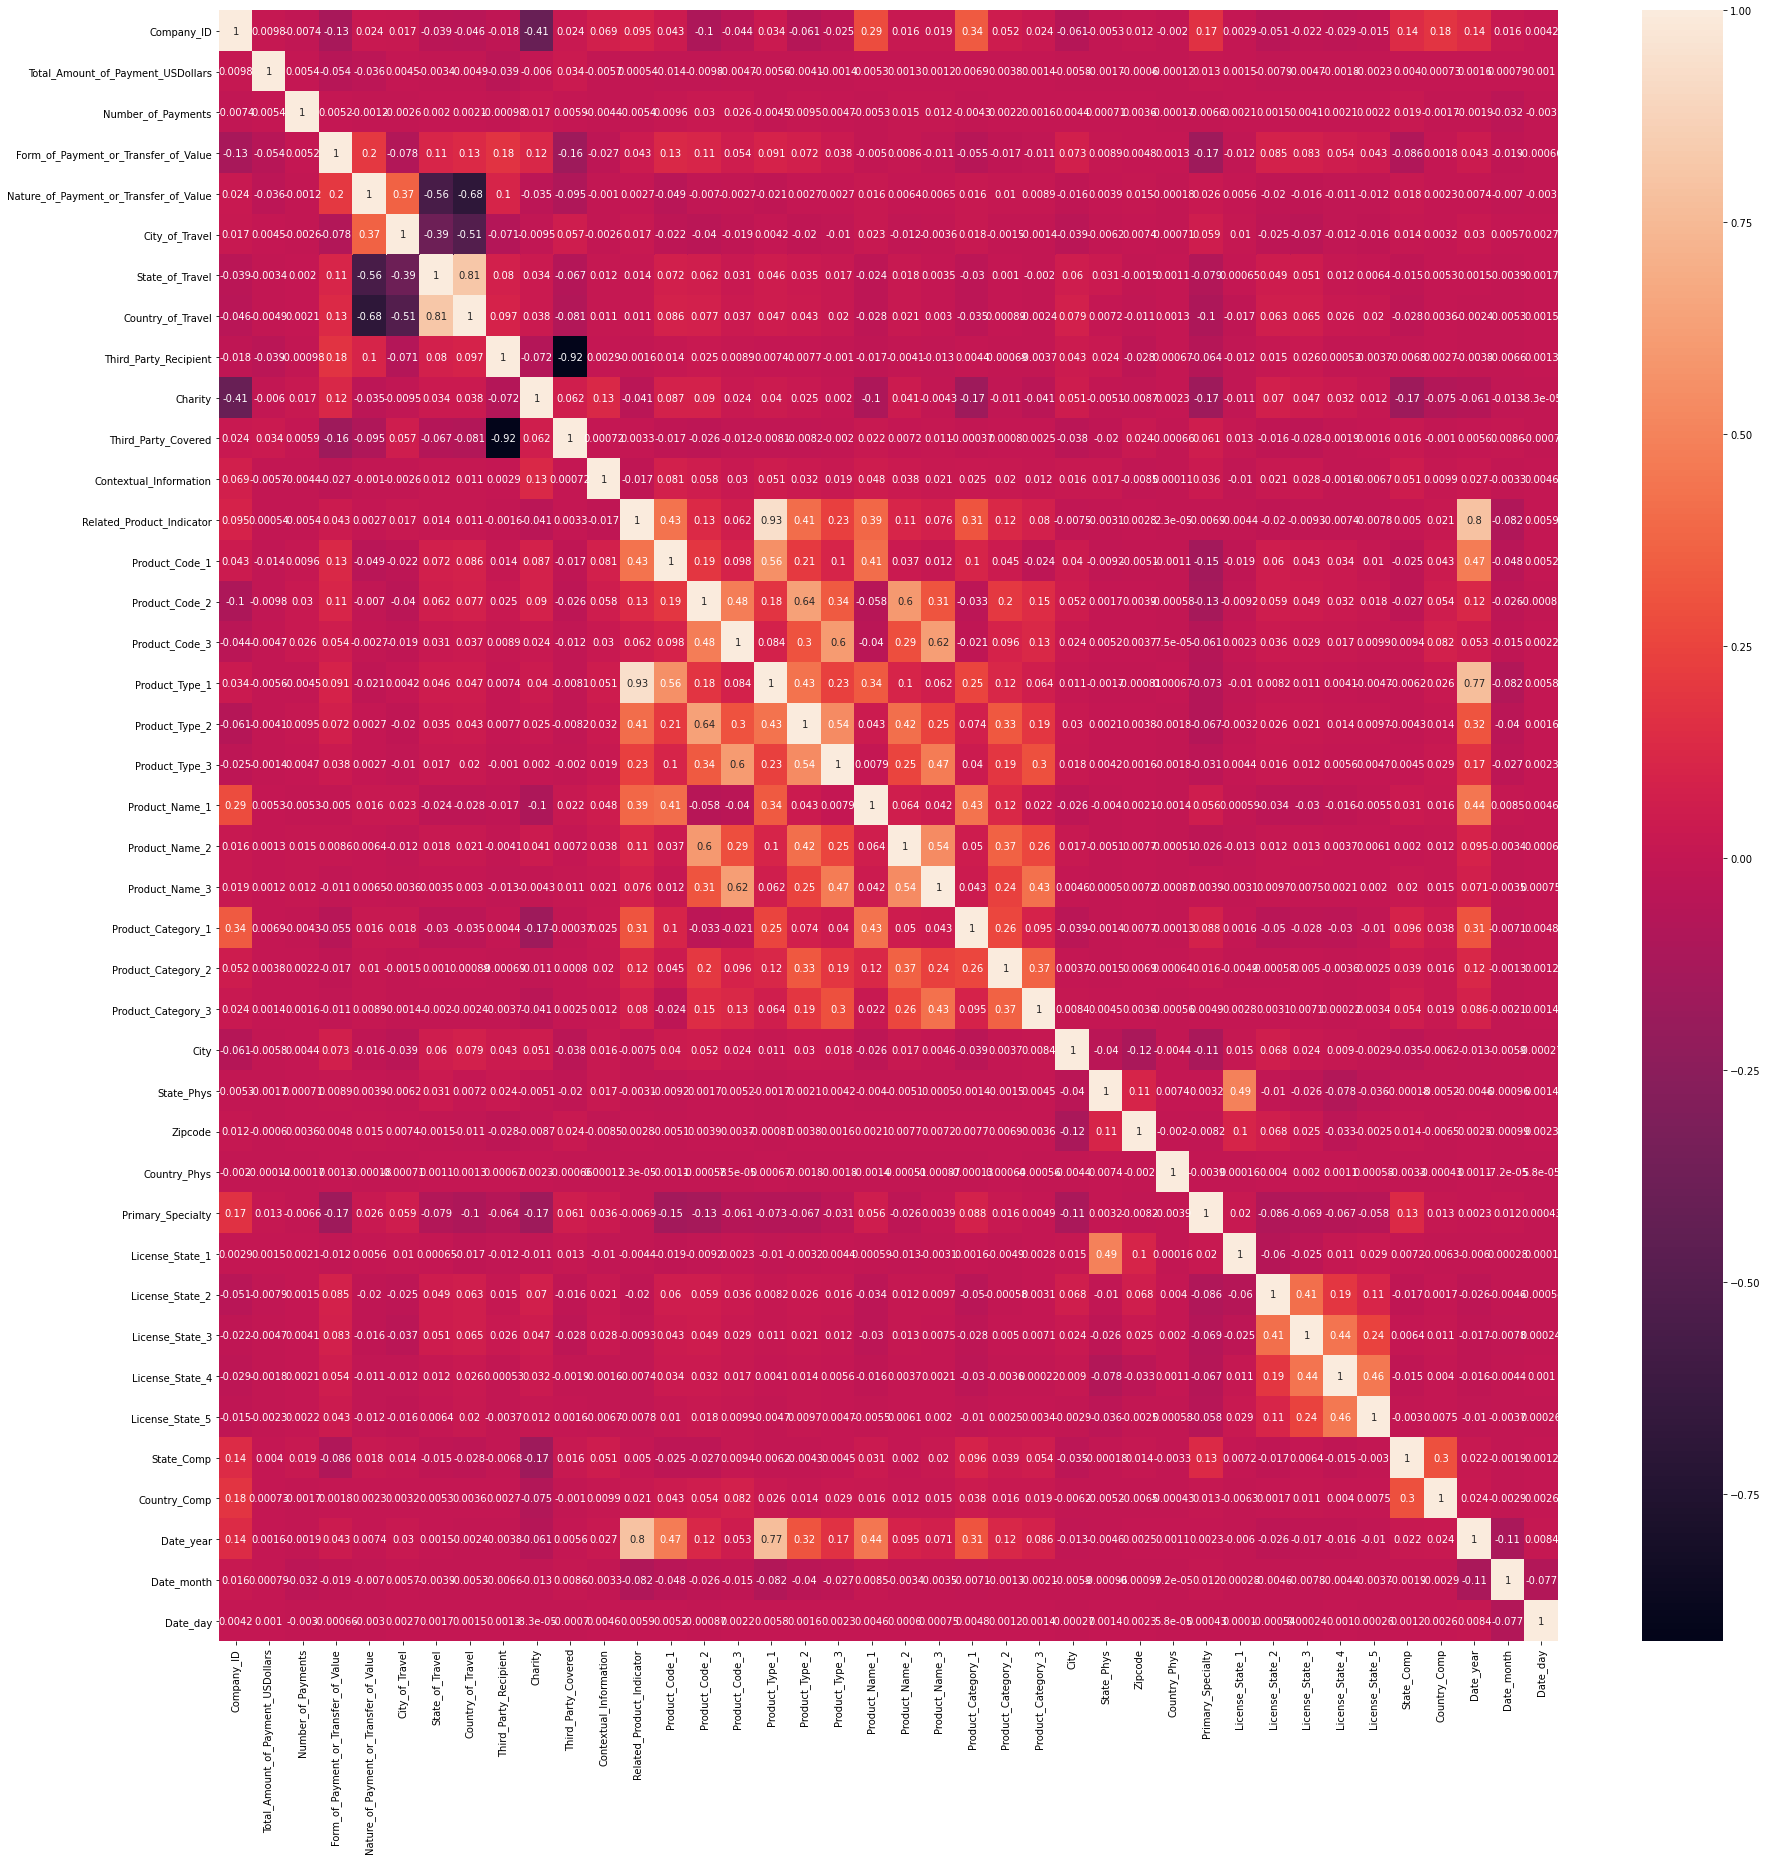

In [122]:
# df_train['Ownership_Indicator']=df_train['Ownership_Indicator'].astype(int)
fig = plt.figure(figsize = (30,30))
ax = fig.gca()
# df_train.drop(columns=['set'],inplace=True)

heatmap = sns.heatmap(df_train.corr(), annot=True)
fig = heatmap.get_figure()
fig.savefig("heatmap_after_na_encode.png")

In [103]:

# df.drop(columns=['Date'],inplace=True)
# print(df.dtypes)
# df_scrap=df_train.query('Nature_of_Payment_or_Transfer_of_Value.notna() and City_of_Travel.notna()', engine='python')
# df_scrap
print(df_payments.Third_Party_Recipient.value_counts())
print(df_payments.Third_Party_Covered.value_counts())


No Third Party Payment    1382708
Entity                      14742
Individual                   4800
Name: Third_Party_Recipient, dtype: int64
No     17051
Yes     2481
Name: Third_Party_Covered, dtype: int64


In [121]:

df_test=df[df.set=="test"]
df_train=df[df.set=="train"]
df_train.drop(columns=['set'],inplace=True)
df_test.drop(columns=['set'],inplace=True)


c:\python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
df.to_csv("./data/encoded_without_drop.csv",index=False)

In [ ]:
df.columns
print(df.shape)
first_col = df.pop("Ownership_Indicator")
print(df.shape)
df.insert(47,"Ownership_Indicator",first_col)
print(df.shape)
print(df.columns)

In [104]:
# df_test=df[df.set=="test"]
# df_train=df[df.set=="train"]
df_test.drop(columns=['set'],inplace=True)

c:\python38\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "Yes"),1,df_train.Ownership_Indicator)
df_train['Ownership_Indicator']=np.where((df_train.Ownership_Indicator == "No"),0,df_train.Ownership_Indicator)

In [ ]:
print(df_train[df_train['Company_Name']=="Biogen Idec Inc."]['Ownership_Indicator'].value_counts())
print(df_train['Ownership_Indicator'].value_counts())

In [ ]:
df_scrap=df_train_final[df_train_final['Company_Name']=="Biogen Idec Inc."]
df_scrap.Ownership_Indicator.value_counts()

In [ ]:
print(df_train_final.columns)
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
sns.countplot(x='Ownership_Indicator',hue='Company_Name', data=df_train_final)

In [ ]:
df_train.Ownership_Indicator.value_counts()


In [123]:
df_train_maj=df_train[df_train.Ownership_Indicator==0]
df_train_min=df_train[df_train.Ownership_Indicator==1]
df_train_maj_down=resample(df_train_maj, replace=False, n_samples=2404, random_state=2021)
df_train_final = pd.concat([df_train_maj_down, df_train_min])
df_train_final.shape

(4808, 42)

In [140]:
# df_train_final['is_train']=np.random.uniform(0,1,len(df_train_final)) <=.80
# print(df_train_final.columns)
# df_train_final
# df_train_final.drop(columns=['Date'],inplace=True)
df_train_final['Ownership_Indicator']=df_train_final['Ownership_Indicator'].astype(int)

In [141]:

train, test = df_train_final[df_train_final['is_train']==True], df_train_final[df_train_final['is_train']==False]
train = shuffle(train)
test = shuffle(test)
features=train[train.columns[0:39]]
y=train['Ownership_Indicator']
x_test = test[test.columns[0:39]]
y_test = test['Ownership_Indicator']

In [138]:
print(df_train_final.dtypes)
# print(df_train_final.shape)
# first_col = df_train_final.pop("Ownership_Indicator")
# print(df_train_final.shape)
# df_train_final.insert(41,"Ownership_Indicator",first_col)
# print(df_train_final.shape)

Company_ID                                  int32
Total_Amount_of_Payment_USDollars         float64
Number_of_Payments                          int32
Form_of_Payment_or_Transfer_of_Value         int8
Nature_of_Payment_or_Transfer_of_Value       int8
City_of_Travel                              int64
State_of_Travel                             int64
Country_of_Travel                           int64
Third_Party_Recipient                        int8
Charity                                      int8
Third_Party_Covered                          int8
Contextual_Information                      int16
Related_Product_Indicator                    int8
Product_Code_1                              int64
Product_Code_2                              int64
Product_Code_3                              int64
Product_Type_1                              int64
Product_Type_2                              int64
Product_Type_3                              int64
Product_Name_1                              int64


In [142]:
clf = RandomForestClassifier(n_jobs=-1, oob_score = True, n_estimators = 100, random_state=42)

clf.fit(features, y)

# Accuracy Scores
print ('Internal Accuracy Score', clf.oob_score_)
print ('RF accuracy: TRAINING', clf.score(features,y))
print ('RF accuracy: TESTING', clf.score(x_test,y_test))

Internal Accuracy Score 0.9812987012987013
RF accuracy: TRAINING 1.0
RF accuracy: TESTING 0.9895615866388309


In [143]:
clf.predict(x_test)

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,